In [1]:
# Music data set emotion mapping
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../datasets/musics.csv", sep = ",")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
pd.set_option('display.max_rows', None)
genre_counts = df['track_genre'].value_counts()
genre_counts

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
new-age              1000
mpb                  1000
minimal-techno       1000
metalcore            1000
metal                1000
mandopop             1000
malay                1000
latino               1000
latin                1000
kids                 1000
k-pop                1000
jazz                 1000
j-rock               1000
j-pop                1000
j-idol               1000
j-dance              1000
iranian              1000
psych-rock           1000
punk                 1000
afrobeat             1000
r-n-b                1000
turkish              1000
trip-hop             1000
trance               1000
techno               1000
tango                1000
synth-pop            1000
swedish              1000


In [4]:
len(genre_counts)

114

In [5]:
df.shape

(114000, 21)

In [6]:
# Main emotions 
# 'Happy', 'Sad', 'Frustration', "Neutral"

# Used Genres
# 1. alternative & indie, 2. blues, 3. classical, 4. country, 5. 
# electronica & dance, 6. folk, 7. gospel, 8. hip-hop & rap, 9. 
# jazz, 10. Latin, 11. metal, 12. new age, 13. pop, 14. reggae, 15. 
# rock, 16. soul, rnb & funk, and 17. world music

# Given list of genres
given_genres = ['alternative', 'indie', 'blues', 'classical', 'country', 'electronic', 'electro', 'dance', 'folk', 'gospel', 'hip-hop',
               'rap', 'jazz', 'latin', 'metal', 'new-age', 'pop', 'reggae', 'rock', 'soul', 'r-n-b', 'funk', 'world-music']

# Extract unique genres from the DataFrame
dataset_genres = df['track_genre'].unique()

# Find genres among the given list that are present in the dataset
common_genres = set(given_genres).intersection(set(dataset_genres))

print("Genres present in the moview:", len(given_genres))
print("Genres present in the dataset:", len(dataset_genres))
print("Genres from the given list that are present in the dataset:", len(common_genres))

Genres present in the moview: 23
Genres present in the dataset: 114
Genres from the given list that are present in the dataset: 22


In [7]:
# Find genres from the given list that are not present in the dataset
genres_not_in_dataset = set(given_genres) - set(dataset_genres)


print("Genres from the given list that are not present in the dataset:", genres_not_in_dataset)

Genres from the given list that are not present in the dataset: {'rap'}


In [8]:
filtered_df = df[df['track_genre'].isin(given_genres)]
filtered_df.shape

(22000, 21)

In [9]:
# According to the papar 
# Happy = 3, 6 -> pop 'electronic', 'electro', 'dance' 'world-music' 'soul', 'r-n-b', 'funk' latin reggae
# Sad = 1 -> blues
# Frustration = 5 = 'Disgust', 'Fear' -> metal
# neutral = 4 + sleepy = 7 -> folk 'world-music'

# Define the emotion-genre mapping
emotion_genre_mapping = {
    'Frustration': ['metal', 'rock'],
    'Happy': ['pop', 'electronic', 'electro', 'dance', 'world-music', 'soul'],
    'Sad': ['blues', 'alternative', 'indie'],
    'Neutral': ['folk', 'world-music', 'new-age']
}

# Function to map emotions based on genres
def map_emotions(genres):
    emotions = []
    for emotion, genre_list in emotion_genre_mapping.items():
        if any(genre in genres for genre in genre_list):
            emotions.append(emotion)
    return emotions if emotions else ['Unknown']  # Assign 'Unknown' if no emotion is found

# Create a new column 'emotions' and map it based on genres
filtered_df['emotions'] = filtered_df['track_genre'].apply(map_emotions)

# Display the resulting DataFrame
filtered_df.head()




C:\Users\Owner\AppData\Local\Temp\ipykernel_12716\3331772943.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['emotions'] = filtered_df['track_genre'].apply(map_emotions)


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,emotions
3000,3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,...,1,0.0329,0.0678,0.149000,0.123,0.337,85.012,4,alternative,[Sad]
3001,3001,09gysnJpfQ3ublBmJDfcEC,Amaarae;Kali Uchis;Moliy,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,79,204763,True,0.870,0.523,...,0,0.0602,0.4330,0.000021,0.113,0.319,110.020,4,alternative,[Sad]
3002,3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,...,0,0.0300,0.0484,0.000417,0.286,0.370,93.986,4,alternative,[Sad]
3003,3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,...,1,0.0336,0.0495,0.017700,0.101,0.398,124.053,4,alternative,[Sad]
3004,3004,4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,abcdefu,86,168601,True,0.695,0.540,...,1,0.0493,0.2990,0.000000,0.367,0.415,121.932,4,alternative,[Sad]


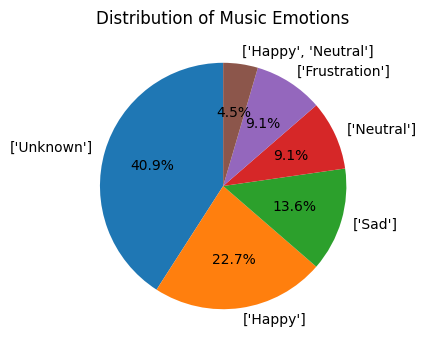

In [10]:
# Count the occurrences of each label
label_counts = filtered_df['emotions'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Emotions')
plt.show()

In [11]:
label_counts = filtered_df['emotions'].value_counts()
print(label_counts)

emotions
[Unknown]           9000
[Happy]             5000
[Sad]               3000
[Neutral]           2000
[Frustration]       2000
[Happy, Neutral]    1000
Name: count, dtype: int64


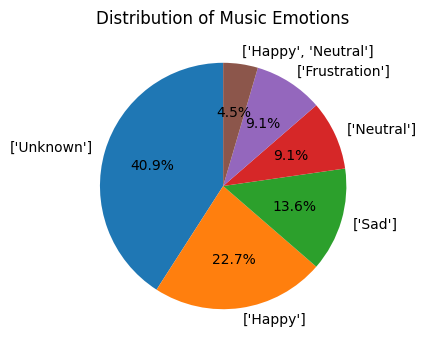

In [12]:
# Count the occurrences of each label
label_counts = filtered_df['emotions'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Emotions')
plt.show()

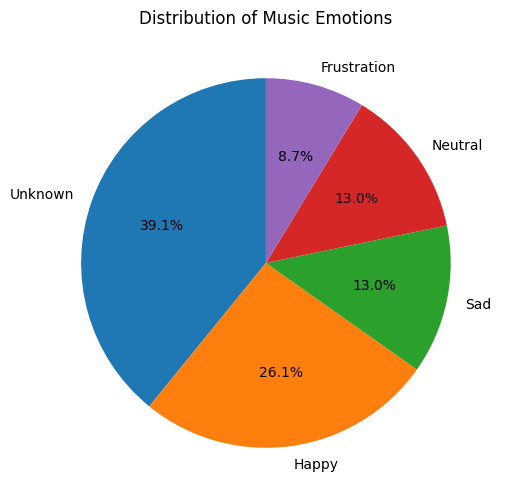

In [13]:
# Flatten the list of emotions
all_emotions = [emotion for emotions_list in filtered_df['emotions'] for emotion in emotions_list]

# Count the occurrences of each label
label_counts = pd.Series(all_emotions).value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Emotions')
plt.show()

In [14]:
label_counts = filtered_df['emotions'].value_counts()
print(label_counts)

emotions
[Unknown]           9000
[Happy]             5000
[Sad]               3000
[Neutral]           2000
[Frustration]       2000
[Happy, Neutral]    1000
Name: count, dtype: int64


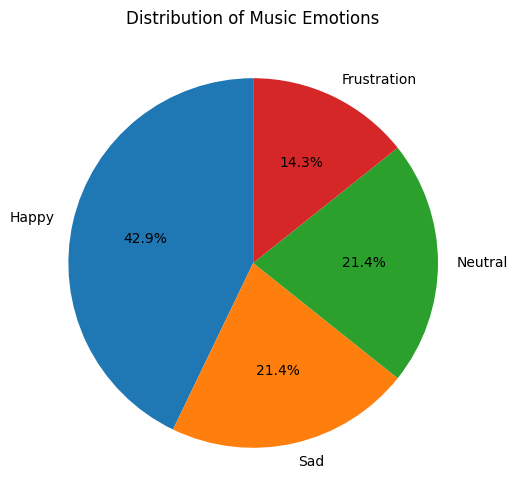

In [15]:
# Flatten the list of emotions and filter out 'Unknown' emotions
all_emotions = [emotion for emotions_list in filtered_df['emotions'] for emotion in emotions_list if emotion != 'Unknown']

# Count the occurrences of each label
label_counts = pd.Series(all_emotions).value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Emotions')
plt.show()

In [16]:
filtered_df.shape

(22000, 22)

In [17]:
# Create df2 by dropping records with 'Unknown' label
df2 = filtered_df[filtered_df['emotions'].apply(lambda x: 'Unknown' not in x)].copy()

# Reset index
df2.reset_index(drop=True, inplace=True)

# Display the first few rows of df2
df2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,emotions
0,3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,...,1,0.0329,0.0678,0.149000,0.123,0.337,85.012,4,alternative,[Sad]
1,3001,09gysnJpfQ3ublBmJDfcEC,Amaarae;Kali Uchis;Moliy,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,79,204763,True,0.870,0.523,...,0,0.0602,0.4330,0.000021,0.113,0.319,110.020,4,alternative,[Sad]
2,3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,...,0,0.0300,0.0484,0.000417,0.286,0.370,93.986,4,alternative,[Sad]
3,3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,...,1,0.0336,0.0495,0.017700,0.101,0.398,124.053,4,alternative,[Sad]
4,3004,4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,abcdefu,86,168601,True,0.695,0.540,...,1,0.0493,0.2990,0.000000,0.367,0.415,121.932,4,alternative,[Sad]


In [18]:
df2.shape

(13000, 22)

In [19]:
df2.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,emotions
12995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music,"[Happy, Neutral]"
12996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music,"[Happy, Neutral]"
12997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music,"[Happy, Neutral]"
12998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music,"[Happy, Neutral]"
12999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music,"[Happy, Neutral]"


In [20]:
df3 = df2[['track_id', 'artists', 'album_name', 'track_name', 'track_genre', 'emotions']]

df3.rename(columns={'track_name': 'name'}, inplace=True)
df3.rename(columns={'track_genre': 'genre'}, inplace=True)

df3.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_12716\2469004600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={'track_name': 'name'}, inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_12716\2469004600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={'track_genre': 'genre'}, inplace=True)


,track_id,artists,album_name,name,genre,emotions
0,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,alternative,[Sad]
1,09gysnJpfQ3ublBmJDfcEC,Amaarae;Kali Uchis;Moliy,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...,alternative,[Sad]
2,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,alternative,[Sad]
3,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,alternative,[Sad]
4,4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,abcdefu,alternative,[Sad]


In [21]:
df3.shape

(13000, 6)

In [22]:
df3.to_csv('../datasets/music_filtered_data.csv', index=False)

In [26]:
unique_genres = df3['genre'].unique().tolist()
print(unique_genres)

['alternative', 'blues', 'dance', 'electro', 'electronic', 'folk', 'indie', 'metal', 'new-age', 'pop', 'rock', 'soul', 'world-music']


In [ ]:
len(unique_genres)

13